# EDA Extensivo

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd

In [31]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [32]:
from utils.data import Datasets
from utils.eda import column_explore

In [33]:
ds = Datasets()

## EDA de DataFrame cash_request

In [34]:
ds.dataset_cash_original_df.info()
# 23.970 filas
# Columnas de fechas:
    # created_at
    # updated_at
    # moderated_at
    # reimbursement_date
    # cash_request_received_date
    # money_back_date
    # send_at
    # reco_creation
    # reco_last_update
# Columnas categóricas:
    # status
    # transfer_type
    # recovery_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [35]:
ds.cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             16543 non-null  datetime64[ns,

In [36]:
# OBSERVACIÓN: 'created_at' está en formato UTC pero 'cash_request_received_date' no, porque esa columna no tenía información horaria sino sólo la fecha.

In [37]:
ds.dataset_cash_original_df['created_at'].sample(5)


9079     2020-02-06 20:09:57.328839+00
21153    2020-10-28 08:16:35.216588+00
15170    2020-10-06 09:37:35.108033+00
46       2019-12-13 08:33:04.569112+00
14121     2020-08-10 14:54:44.18949+00
Name: created_at, dtype: object

In [38]:
ds.dataset_cash_original_df['cash_request_received_date'].sample(5)

23851    2020-10-24
8589     2020-07-21
5156            NaN
12542    2020-06-18
13636    2020-10-01
Name: cash_request_received_date, dtype: object

In [39]:
# La conversión de las siguiente columnas dio errores. Inspeccionaremos las columnas para per cómo subsanarlos.

# 'moderated_at'
# ValueError: time data "2019-12-20 17:29:18+00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 157. You might want to try:
#     - passing `format` if your strings have a consistent format;
#     - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
#     - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# 'reimbursement_date'
# time data "2020-06-05 22:00:00+00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 4. You might want to try:

# 'money_back_date'
# ValueError: time data "2020-07-15 22:00:00+00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 12. You might want to try:

# 'send_at'
# ValueError: time data "2020-08-12 09:34:16+00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 29. You might want to try:

In [40]:
print(ds.dataset_cash_original_df.loc[157,'moderated_at'])
print()
print(ds.dataset_cash_original_df['moderated_at'].sample(5))

2019-12-20 17:29:18+00

2029     2020-06-19 12:49:00.557015+00
19137                              NaN
14551                              NaN
22742                              NaN
8901                               NaN
Name: moderated_at, dtype: object


In [41]:
# Prueba de conversión a fecha para una de las columnas conflictivas
ds.cash['moderated_at'] = pd.to_datetime(ds.cash['moderated_at'], format='mixed')        

In [42]:
# CONCLUSIÓN: Podemos usar el parámetro format='mixed' para las fechas problemáticas.

In [43]:
print(ds.cash.loc[157,'moderated_at'])
print(ds.cash['moderated_at'].dtype)

2019-12-20 17:29:18+00:00
datetime64[ns, UTC]


## EDA de DataFrame fees

In [44]:
ds.dataset_fees_original_df.info()
# 21.061 filas
# Columnas de fechas:
    # created_at
    # updated_at
    # paid_at
    # from_date
    # to_date    
# Columnas categóricas:
    # type
    # status
    # category    
    # reason ¿?
    # charge_moment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [45]:
ds.fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21061 non-null  int64              
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

## Correlación entre datos

### DataFrame cash_request

In [46]:
numericals = ds.cash.select_dtypes(np.number)
numericals.head()

,cash_request_id,amount,user_id,deleted_account_id,id_usuario
0,5,100.0,804.0,NaN,804
1,70,100.0,231.0,NaN,231
2,7,100.0,191.0,NaN,191
3,10,99.0,761.0,NaN,761
4,1594,100.0,7686.0,NaN,7686


In [47]:
corr = numericals.corr()
display(corr)

,cash_request_id,amount,user_id,deleted_account_id,id_usuario
cash_request_id,1.000000,-0.363045,0.719851,0.457923,0.711719
amount,-0.363045,1.000000,-0.313530,-0.138289,-0.296895
user_id,0.719851,-0.313530,1.000000,NaN,1.000000
deleted_account_id,0.457923,-0.138289,NaN,1.000000,0.999969
id_usuario,0.711719,-0.296895,1.000000,0.999969,1.000000


<Axes: >

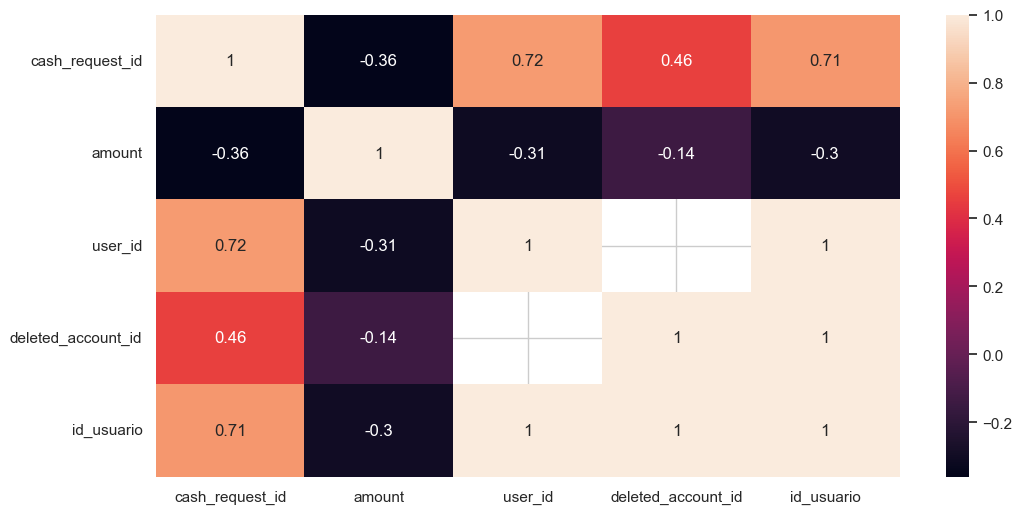

In [48]:
# Create a heatmap to visualize the correlation matrix

import seaborn as sns
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines

sns.heatmap(corr.round(2), annot=True)

### DataFrame fees

In [49]:
numericals = ds.fees.select_dtypes(np.number)
numericals.head()

,id,cash_request_id,total_amount
0,6537,14941,5.0
1,6961,11714,5.0
2,16296,23371,5.0
3,20775,26772,5.0
4,11242,19350,5.0


In [50]:
corr = numericals.corr()
display(corr)

,id,cash_request_id,total_amount
id,1.000000,0.884239,0.005544
cash_request_id,0.884239,1.000000,0.006710
total_amount,0.005544,0.006710,1.000000


<Axes: >

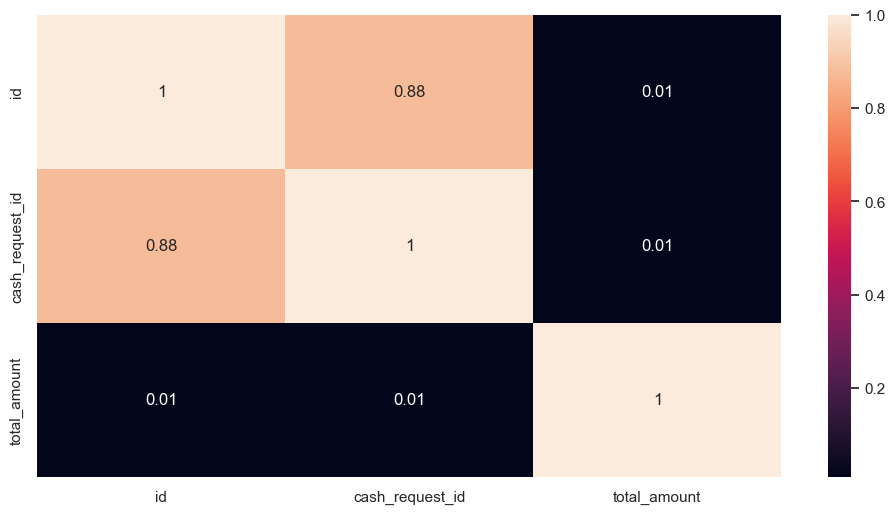

In [51]:
# Create a heatmap to visualize the correlation matrix

import seaborn as sns
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines

sns.heatmap(corr.round(2), annot=True)

### DataFrame merged

In [52]:
ds.merge_tables()
numericals = ds.merged.select_dtypes(np.number)
numericals.head()

,cash_request_id,amount,user_id,deleted_account_id,id_usuario,fee_id,fee_cash_request_id,fee_total_amount
0,3.0,1.0,47.0,NaN,47.0,NaN,NaN,NaN
1,4.0,100.0,NaN,1309.0,1309.0,NaN,NaN,NaN
2,5.0,100.0,804.0,NaN,804.0,NaN,NaN,NaN
3,6.0,100.0,812.0,NaN,812.0,NaN,NaN,NaN
4,7.0,100.0,191.0,NaN,191.0,NaN,NaN,NaN


In [53]:
corr = numericals.corr()
display(corr)

,cash_request_id,amount,user_id,deleted_account_id,id_usuario,fee_id,fee_cash_request_id,fee_total_amount
cash_request_id,1.000000,-0.338806,0.712542,0.452444,0.704965,0.884238,1.000000,0.006710
amount,-0.338806,1.000000,-0.288022,-0.110441,-0.272915,-0.290704,-0.316413,-0.008142
user_id,0.712542,-0.288022,1.000000,NaN,1.000000,0.643388,0.686447,NaN
deleted_account_id,0.452444,-0.110441,NaN,1.000000,0.999976,0.578625,0.598340,0.032938
id_usuario,0.704965,-0.272915,1.000000,0.999976,1.000000,0.642265,0.683745,-0.003111
fee_id,0.884238,-0.290704,0.643388,0.578625,0.642265,1.000000,0.884239,0.005544
fee_cash_request_id,1.000000,-0.316413,0.686447,0.598340,0.683745,0.884239,1.000000,0.006710
fee_total_amount,0.006710,-0.008142,NaN,0.032938,-0.003111,0.005544,0.006710,1.000000


<Axes: >

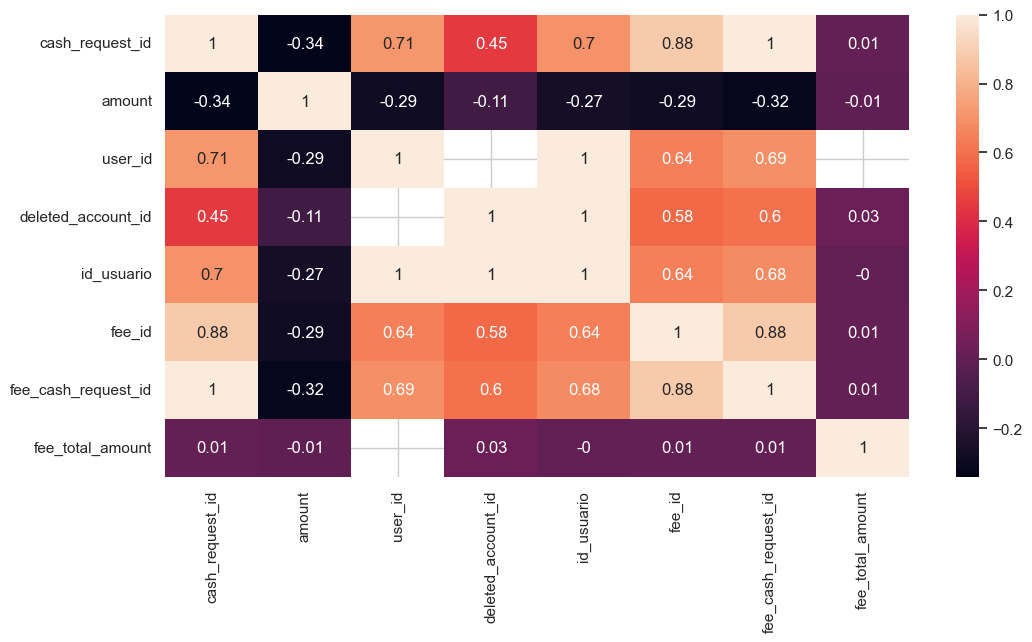

In [54]:
# Create a heatmap to visualize the correlation matrix

import seaborn as sns
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines

sns.heatmap(corr.round(2), annot=True)

In [55]:
ds.cash[ds.cash['deleted_account_id'].isna()].shape

(21866, 17)